# Regresi Linier Variabel Jamak

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import pandas as pd
%matplotlib inline

In [64]:
df = pd.read_csv("vgsales.csv")

#membaca dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [79]:
#eksplorasi data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [66]:
cdf = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
cdf.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
5,23.20,2.26,4.22,0.58,30.26
6,11.38,9.23,6.50,2.90,30.01
7,14.03,9.20,2.93,2.85,29.02
8,14.59,7.06,4.70,2.26,28.62
9,26.93,0.63,0.28,0.47,28.31


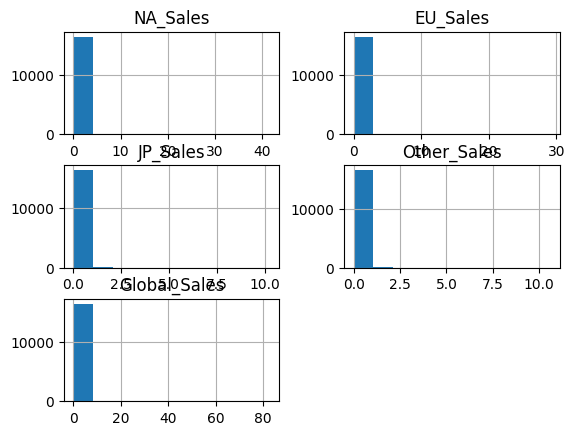

In [67]:
#visualisasi data histogram
viz = cdf[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
viz.hist()
plt.show()

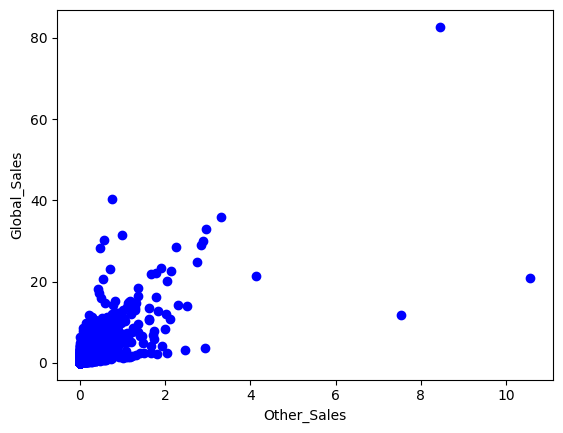

In [68]:
#visualisasi data Other Sales vs Global Sales
plt.scatter(cdf.Other_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
plt.show()

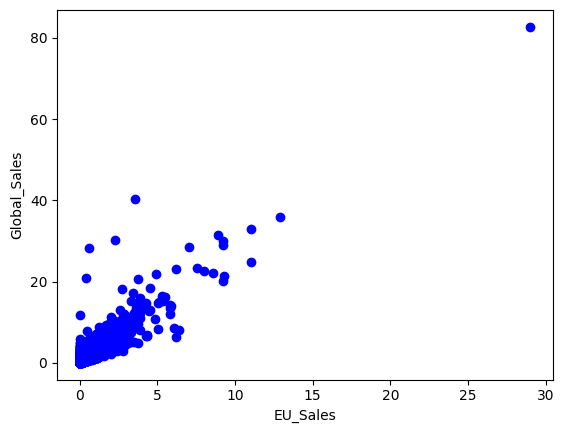

In [69]:
#visualisasi data EU Sales vs Global Sales
plt.scatter(cdf.EU_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
plt.show()

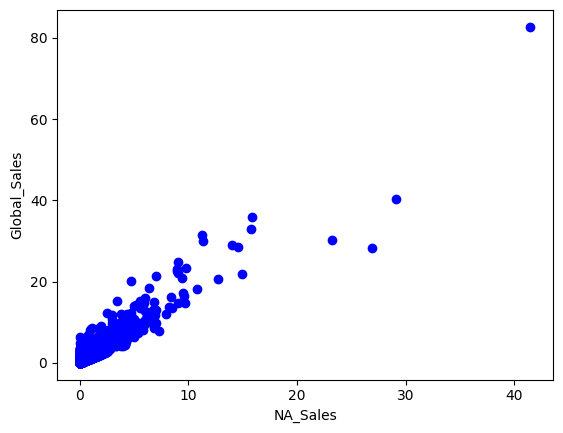

In [70]:
#visualisasi data NA Sales vs Global Sales
plt.scatter(cdf.NA_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
plt.show()

In [71]:
#membuat dataset train dan test
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

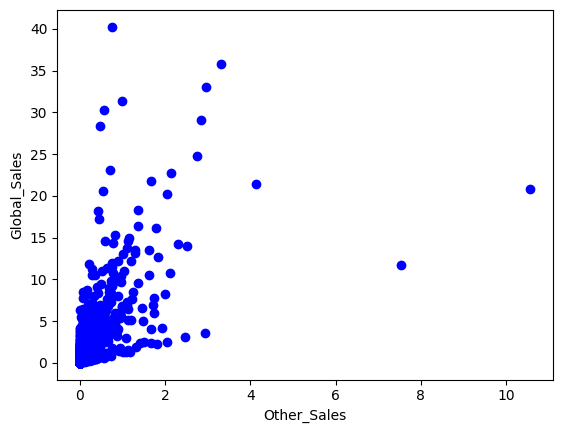

In [72]:
#visualisasi data train Other Sales vs Global Sales
plt.scatter(train.Other_Sales, train.Global_Sales,  color='blue')
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
plt.show()

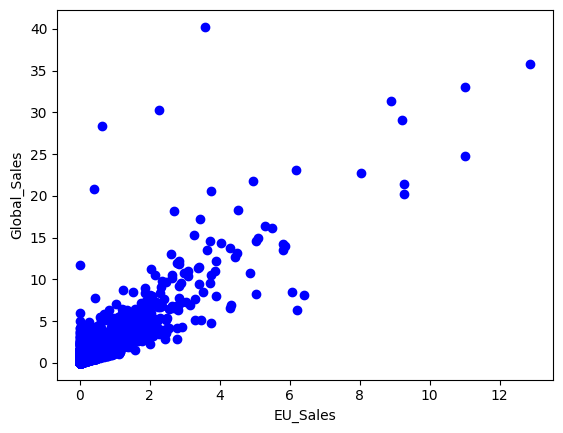

In [73]:
#visualisasi data train EU Sales vs Global Sales
plt.scatter(train.EU_Sales, train.Global_Sales,  color='blue')
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
plt.show()

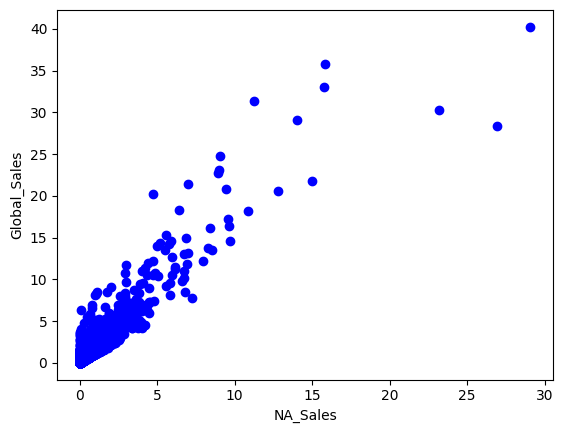

In [74]:
#visualisasi data train NA Sales vs Global Sales
plt.scatter(train.NA_Sales, train.Global_Sales,  color='blue')
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
plt.show()

In [75]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['EU_Sales']])
train_y = np.asanyarray(train[['Global_Sales']])
regr.fit (train_x, train_y)

LinearRegression()

In [76]:
#The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.72773085]]
Intercept:  [0.13516219]


Text(0, 0.5, 'Global_Sales')

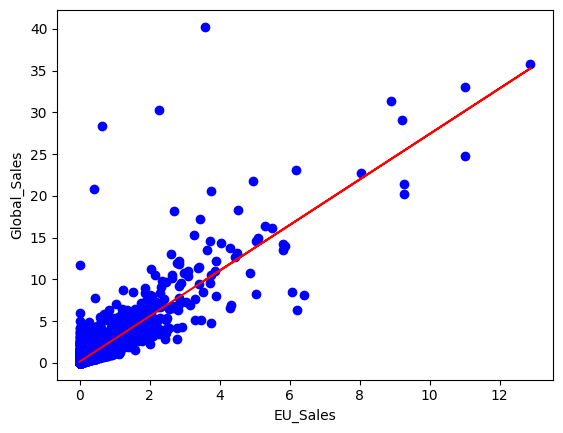

In [77]:
#visualisasi data train EU Sales vs Global Sales dengan garis
plt.scatter(train.EU_Sales, train.Global_Sales,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")

In [78]:
#evaluasi
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['EU_Sales']])
test_y = np.asanyarray(test[['Global_Sales']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.24
Residual sum of squares (MSE): 0.28
R2-score: 0.92
